In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten,Dense,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
from os import listdir
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('/content/drive/MyDrive/brain_dataset/',
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 198 images belonging to 2 classes.


In [24]:
valid_generator=datagen.flow_from_directory( directory="/content/drive/MyDrive/brain_dataset/",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 55 images belonging to 2 classes.


In [25]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

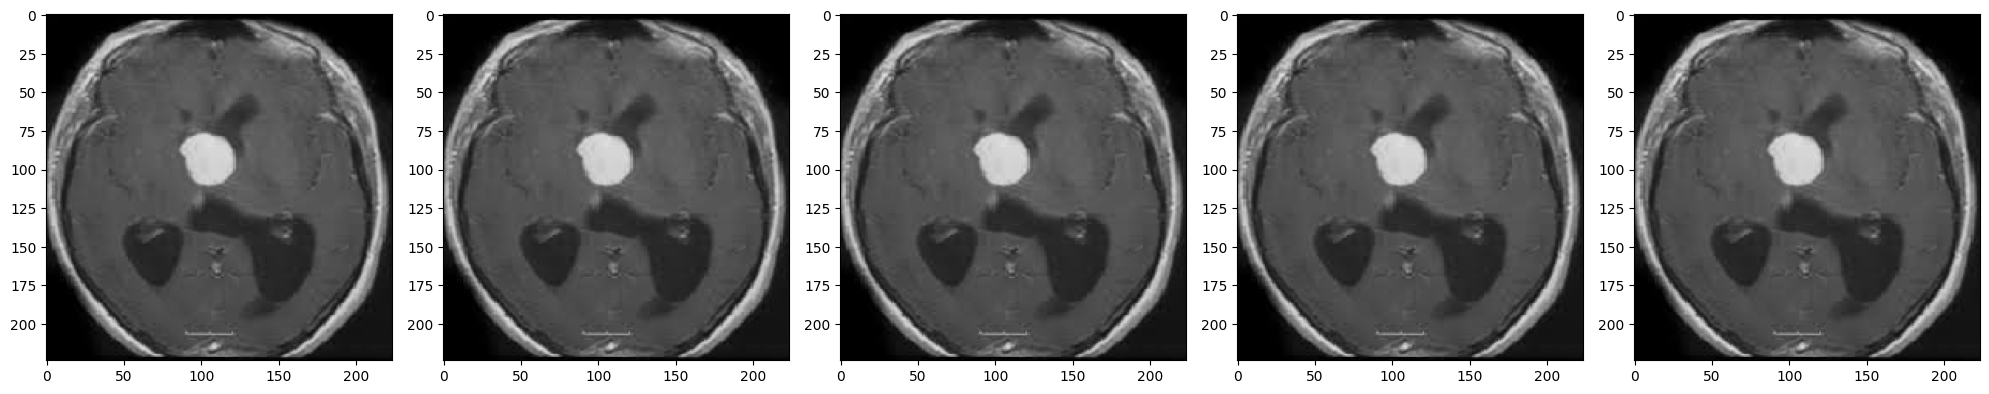

In [26]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [27]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [28]:
import tensorflow_hub as hub

In [29]:
BATCH_SIZE = 5
IMG_SHAPE = 224

In [30]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [31]:
mobile_net.trainable = False

In [32]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
    )

Epoch 1/10
7/7 [==============================] - 24s 2s/step - loss: 0.6854 - accuracy: 0.5960 - val_loss: 0.5531 - val_accuracy: 0.7273
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.5938 - accuracy: 0.6919 - val_loss: 0.4983 - val_accuracy: 0.8364
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 0.5141 - accuracy: 0.7828 - val_loss: 0.4589 - val_accuracy: 0.8909
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.4667 - accuracy: 0.8434 - val_loss: 0.4124 - val_accuracy: 0.8727
Epoch 5/10
7/7 [==============================] - 10s 1s/step - loss: 0.4195 - accuracy: 0.8687 - val_loss: 0.3846 - val_accuracy: 0.9091
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.4015 - accuracy: 0.8535 - val_loss: 0.3815 - val_accuracy: 0.8909
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.3604 - accuracy: 0.8939 - val_loss: 0.3463 - val_accuracy: 0.8909
Epoch 8/10
7/7 [==================

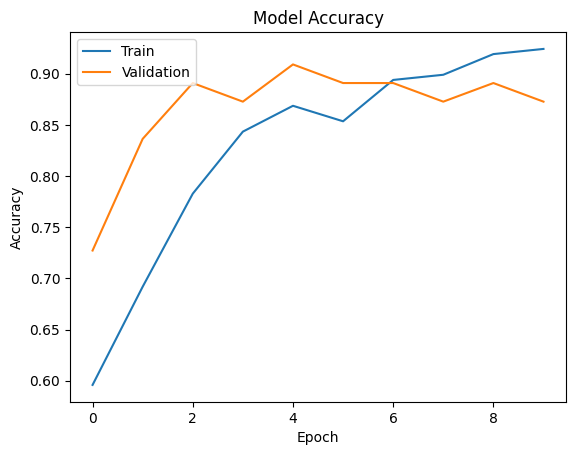

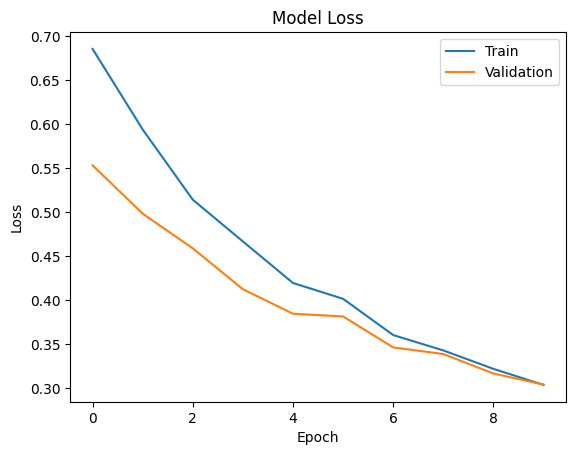

In [35]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/brain_dataset/yes/Y1.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

1/1 [==============================] - 1s 621ms/step


array([[0.7765296]], dtype=float32)

In [37]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

BrainTumor


In [38]:
from tensorflow.keras.models import load_model
model.save('model_2.h5')